<a href="https://colab.research.google.com/github/ZubinO/independentStudy/blob/main/neuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
! gdown --id 1ykAMtHPmjXJpxjtYhZ5wb9kgcIl88DHH

! gdown --id 1I28SOj3Jd8JsR3op-xDBP5eU9cF-igL0

! gdown --id 1OM5W75Z-vJ-H5eLljNoGAMMf80HfZrkh

!gdown --id 16CHuSMK9VpvLJq7ATnENB-tZz81SymxX

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ykAMtHPmjXJpxjtYhZ5wb9kgcIl88DHH
To: /content/glove.twitter.27B.100d.txt
100% 1.02G/1.02G [00:05<00:00, 192MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1I28SOj3Jd8JsR3op-xDBP5eU9cF-igL0
To: /content/reddit2-utf.csv
100% 139M/139M [00:00<00:00, 252MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloadi

In [ ]:
import io
import pandas as pd
df2 = pd.read_csv(('/content/newReddit.csv'), dtype={"Title": str, "Body": str, "Upvotes": float, "Created": float, "Team": str, "Opponent": str, "Winner": str})
#playoffDf = pd.read_csv(('/content/playoffPred2.csv'), dtype={"Title": str, "Body": str, "Upvotes": float, "Created": float, "Team": str, "Opponent": str, "Winner": str})


In [ ]:
codeDict={
    "sea":"Seattle",
    "ari":"Arizona",
    "lar": "Los Angeles",
    "sf": "San Francisco",
    "gb": "Green Bay",
    "min": "Minnesota",
    "det": "Detroit",
    "chi":"Chicago",
    "dal":"Dallas",
    "wsh": "Washington",
    "phi": "Philadelphia",
    "tb":"Tampa Bay",
    "car":"Carolina",
    "no": "New Orleans",
    "atl":"Atlanta",
    "kc":"Kansas City",
    "den":"Denver",
    "lv":"Las Vegas",
    "pit":"Pittsburgh",
    "cin":"Cincinnati",
    "bal":"Baltimore",
    "cle":"Cleveland",
    "jax":"Jacksonville",
    "ten":"Tennessee",
    "hou":"Houston",
    "ind":"Indianapolis",
    "ne":"New England",
    "buf":"Buffalo",
    "mia":"Miami"


}

teamDict={
    "Seattle":["seahawks", "hawks"],
    "Arizona":["cardinals", "cards"],
    "San Francisco": ["49ers", "9ers"],
    "Los Angeles": ["rams"],
    "Green Bay": ["packers"],
    "Minnesota": ["vikings", "vikes"],
    "Detroit": ["lions"],
    "Chicago":["bears"],
    "Dallas":["cowboys"],
    "Washington": ["redskins", "football team"],
    "Philadelphia": ["eagles", "birds"],
    "Tampa Bay":["buccaneers", "bucs"],
    "Carolina":["panthers"],
    "New Orleans": ["saints", "nola"],
    "Atlanta":["falcons"],
    "Kansas City":["chiefs"],
    "Denver":["broncos"],
    "Las Vegas":["raiders"],
    "Pittsburgh":["steelers"],
    "Cincinnati":["bengals"],
    "Baltimore":["ravens"],
    "Cleveland":["browns"],
    "Jacksonville":["jaguars", "jags"],
    "Tennessee":["titans"],
    "Houston":["texans"],
    "Indianapolis":["colts"],
    "New England":["patriots", "pats"],
    "Buffalo":["bills"],
    "Miami":["dolphins"]


}


In [ ]:
def removeMisc(df):
  toReturn=pd.DataFrame(columns=["Title", "Body", "Upvotes", "isComment", "Created", "Team", "Opponent", "Winner"])
  for i in range(0, len(df)-1):
    try:
      opp=df.at[i, "Opponent"]
      if "*" in opp:
        opp=opp[:-2]
      oppNames=[]
      for name in teamDict[opp]:
        oppNames.append(name)
      oppNames.append(opp)
      testBool=False
      for j in oppNames:
        #print("hi")
        ##have to get rid of empty strings
        if len(str(df.at[i,"Title"]))>1:
          if str(j).lower() in str(df.at[i, "Title"]).lower():
            if(int(df.at[i,"Upvotes"])>0):
              testBool=True
          if len(str(df.at[i, "Body"]))>1:
            if j.lower() in str(df.at[i, "Body"]).lower():
              if(int(df.at[i,"Upvotes"])>0):
                testBool=True
      if testBool:
        toReturn=toReturn.append(df[i:i+1])
    except:
      pass
  return toReturn
#cleaned=removeMisc(df2)
cleaned=cleaned.reset_index()


In [ ]:
def createLabels(df):
  labels=[]
  for i in range(0, len(df)-1):
    label=-1
    winner=df.at[i, "Winner"]
    opponent=df.at[i, "Opponent"]
    team=df.at[i, "Team"]
    if winner.lower()==opponent.lower():
      label=0
    elif codeDict[winner]==team:
      label=1
    labels.append(label)
  return labels

#labels=createLabels(cleaned)

In [ ]:
def createInputData(df):
  inputData=[]
  for i in range(0, len(df)-1):
    text=""
    header=str(df.at[i, "Title"]).replace("\n\n", " ")
    bodyText=str(df.at[i, "Body"]).replace("\n\n", " ")
    text = str(header) + " " + str(bodyText)
    inputData.append(text)
  return inputData

#inputs=createInputData(cleaned)

In [ ]:
import tensorflow as tf
import random

from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def findMaxLen(inputs):
  maxLen=0
  for i in inputs:
    text=i.split()
    if len(text)>maxLen:
      maxLen=len(text)
  return maxLen

findMaxLen(inputs)
  

5668

In [ ]:

vocab_size = 29205
EMBEDDING_DIM = 100
max_length = 2000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = int(len(inputs)*.6)
training_size

#labels, inputs = shuffle(labels, inputs, random_state=0)


24889

In [ ]:
training_sentences = inputs[0:training_size]
testing_sentences = inputs[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
embeddings_index = {}
f = open('/content/glove.twitter.27B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Found 1193514 word vectors.


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


In [ ]:
from keras.layers import Embedding

embedding_layer = Embedding(vocab_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)


In [ ]:
model = tf.keras.Sequential([
    embedding_layer,
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, input_shape=(testing_padded.shape[1:]), return_sequences=True)),
    #tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, input_shape=(testing_padded.shape[1:]))),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
num_epochs = 5
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/5
778/778 - 1500s - loss: 0.7008 - accuracy: 0.5006 - val_loss: 0.6928 - val_accuracy: 0.5200 - 1500s/epoch - 2s/step
Epoch 2/5
778/778 - 1489s - loss: 0.6924 - accuracy: 0.5106 - val_loss: 0.6941 - val_accuracy: 0.5099 - 1489s/epoch - 2s/step
Epoch 3/5
778/778 - 1487s - loss: 0.6833 - accuracy: 0.5330 - val_loss: 0.6938 - val_accuracy: 0.5221 - 1487s/epoch - 2s/step
Epoch 4/5
778/778 - 1488s - loss: 0.6706 - accuracy: 0.5587 - val_loss: 0.6942 - val_accuracy: 0.5205 - 1488s/epoch - 2s/step
Epoch 5/5
778/778 - 1489s - loss: 0.6585 - accuracy: 0.5828 - val_loss: 0.7188 - val_accuracy: 0.5271 - 1489s/epoch - 2s/step


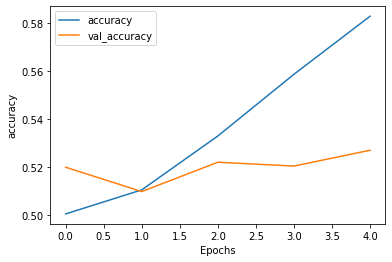

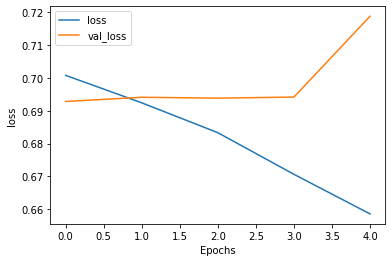

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence = [testing_sentences[0]]
sequences = tokenizer.texts_to_sequences(sentence)  
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

len(training_sentences)
print(len(training_sentences))
print(cleaned.at[24889, "Body"])
testing_sentences[0]

[[0.5086341]]
24889
I have a lot of questions starting with the name which someone else clarified as being a nickname after the game show host. Next question meant in all sincerity: is he a moron?


'Ravens DC Wink Martindale on Aaron Rodgers and Davante Adams: “what is is… De Niro and scorce? Scorsese? That’s like those two.” I have a lot of questions starting with the name which someone else clarified as being a nickname after the game show host. Next question meant in all sincerity: is he a moron?'

In [ ]:
def getVec(sentences):
  toRet=[]
  for i in sentences:
    bob=[i]
    sequences = tokenizer.texts_to_sequences(bob)  
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    x=model.predict(padded)
    toRet.append(x)
  return toRet

#goodVec=getVec(training_sentences)


In [ ]:
betterVec=[]
for i in goodVec:
  betterVec.append(float(i))
weights = pd.DataFrame (betterVec, columns = ['weight'])
weights.to_csv("playoffWeights.csv")

In [ ]:
## do it all but for the playoff stuff
!gdown --id 1upQSls8CPIyfsvrJPng4TAsbPyqXtsoN
playoffDf = pd.read_csv(('/content/playoffPred4.csv'), dtype={"Title": str, "Body": str, "Upvotes": float, "Created": float, "Team": str, "Opponent": str, "Winner": str})




/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1upQSls8CPIyfsvrJPng4TAsbPyqXtsoN
To: /content/playoffPred3.csv
100% 3.85M/3.85M [00:00<00:00, 150MB/s]


In [ ]:
newCleaned=removeMisc(playoffDf)
newCleaned=newCleaned.reset_index()


In [1]:
labels2=createLabels(newCleaned)
inputs2=createInputData(newCleaned)


NameError: ignored

In [ ]:
goodVec=getVec(inputs2)
betterVec=[]
for i in goodVec:
  betterVec.append(float(i))
weights = pd.DataFrame (betterVec, columns = ['weight'])
weights.to_csv("playoffWeights.csv")

